In [1]:
### For the Kaggle notebook only ###

import sys 
import os

module_directory = "/kaggle/input/m2mo-dl/Projet"

# Add the directory to sys.path
if module_directory not in sys.path:
    sys.path.append(module_directory)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


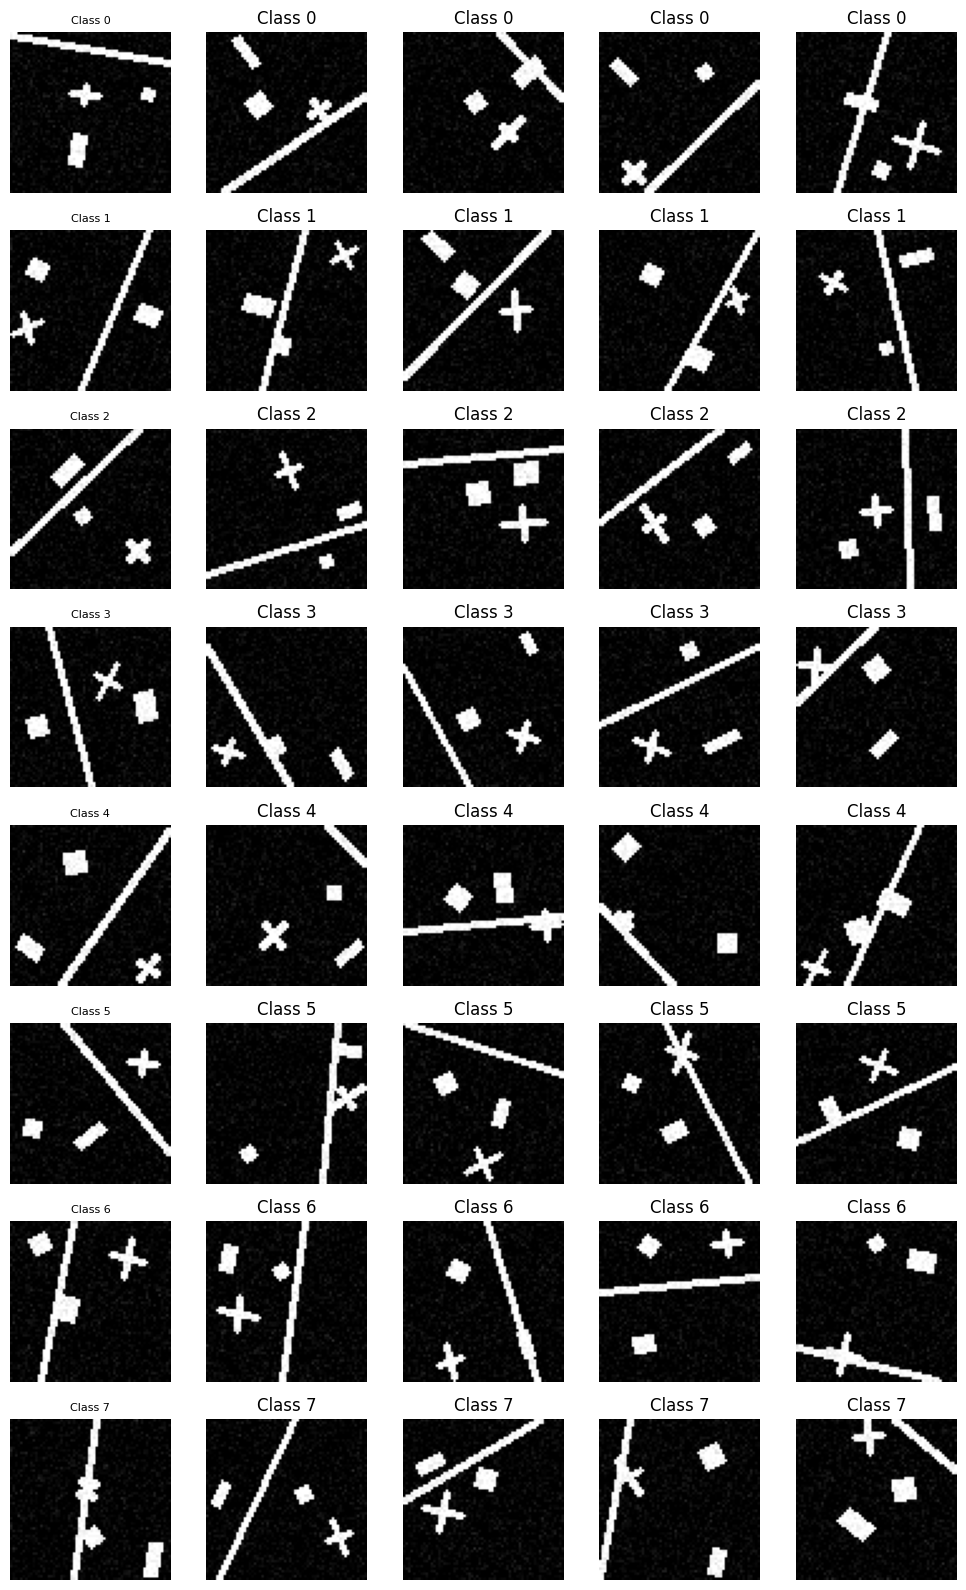

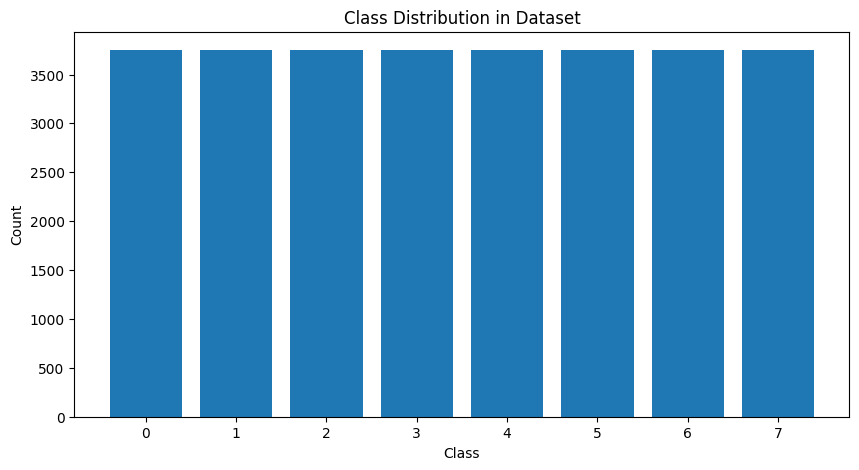

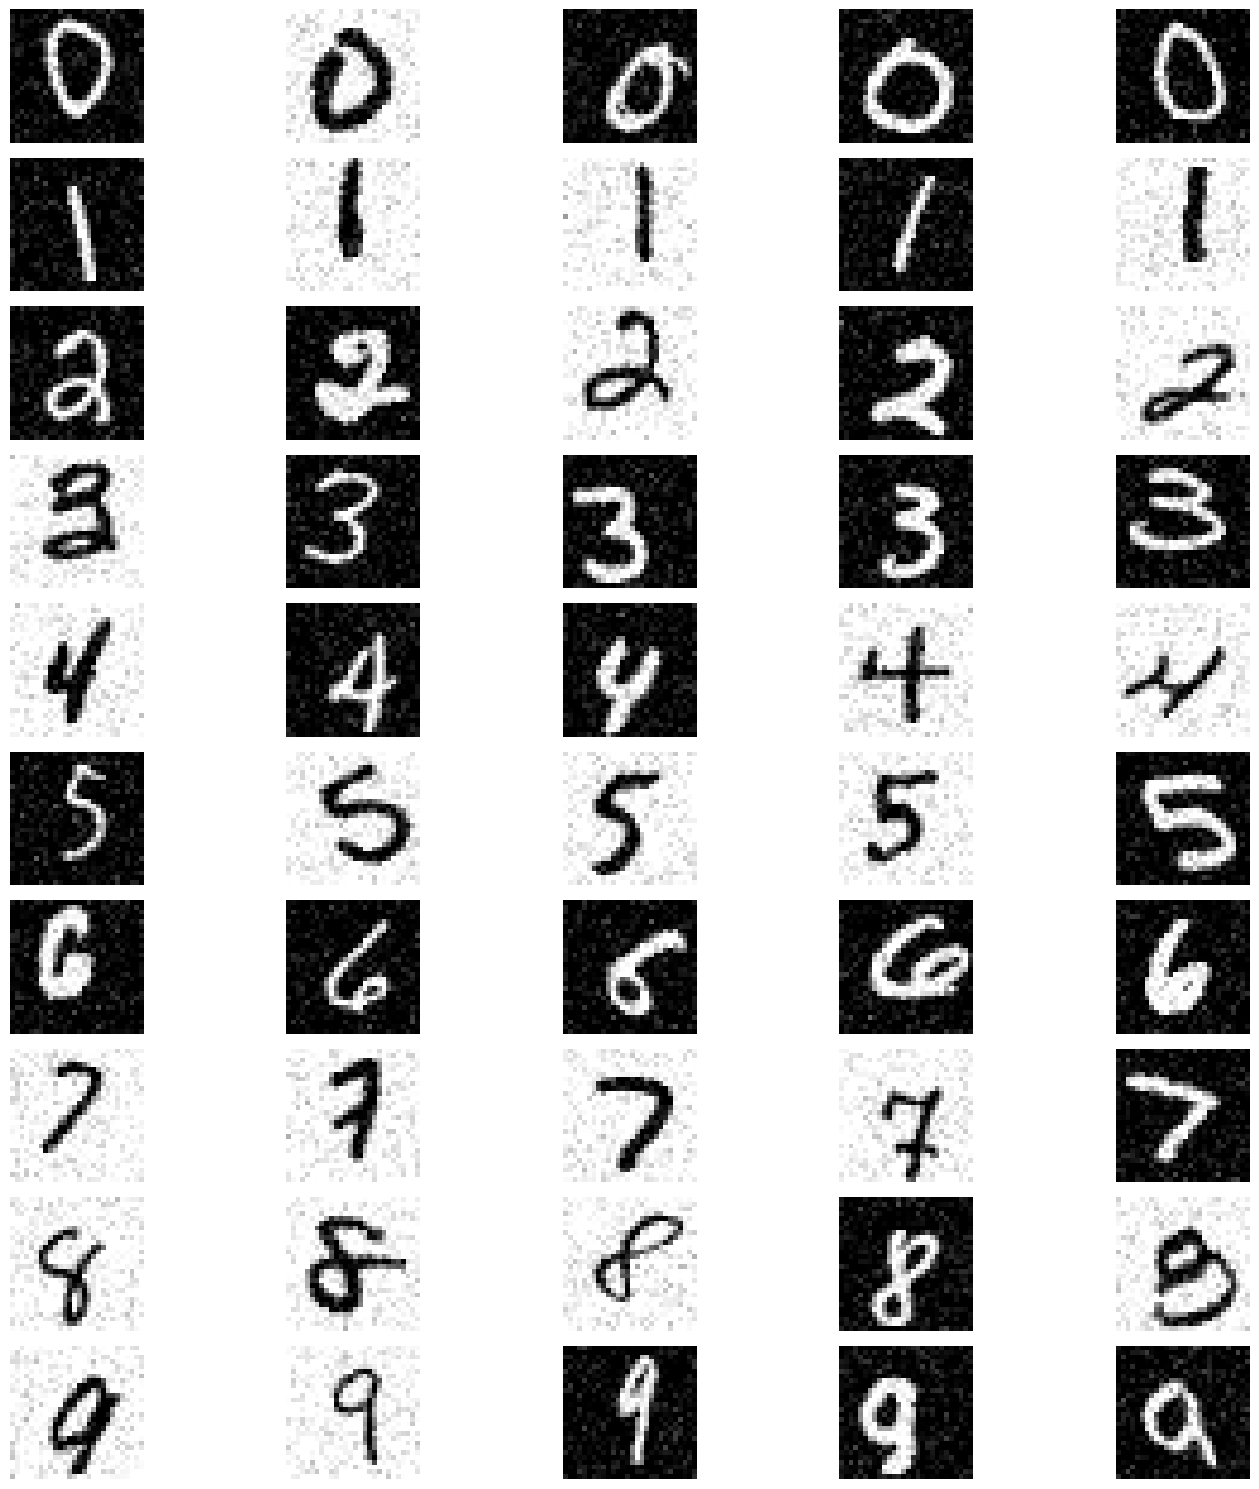

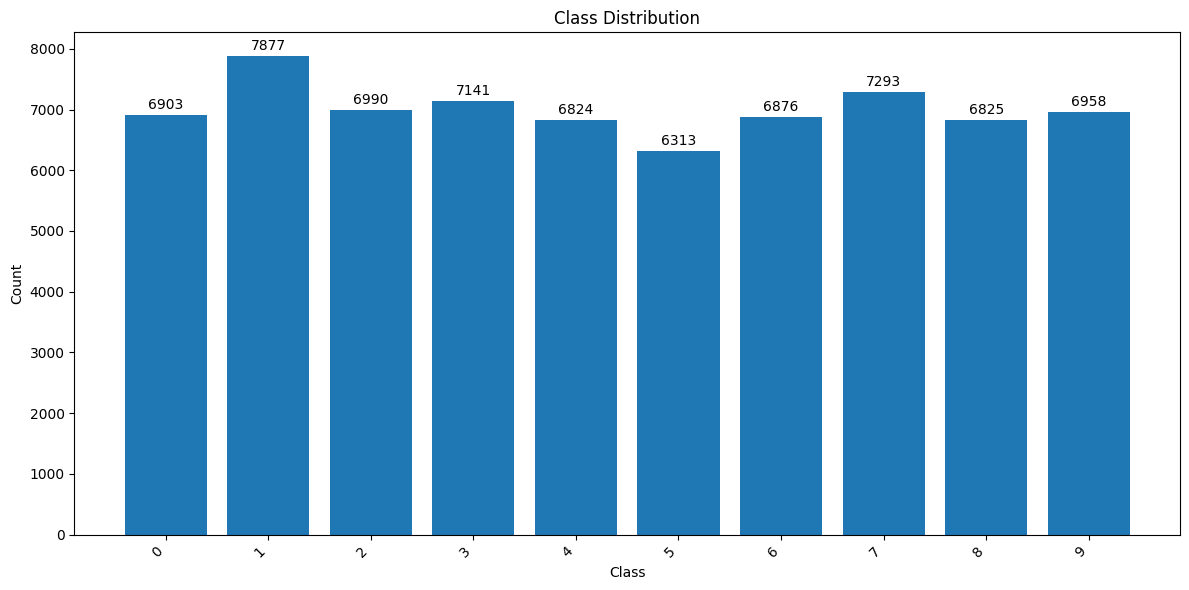

In [3]:
# In your Model_comparison.ipynb
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import gc

# Import datasets
from data.relational_dataset import RelationalDataset
from data.mnist_dataset import MNISTDataset
from data.dataset_utils import create_tf_datasets, visualize_dataset_examples, plot_class_distribution

# Import models
from models.cnn_model import CNN
from models.vit_model import VisionTransformer 
from models.model_trainer import ModelTrainer

# Import evaluation utilities
from utils.model_evaluator import ModelEvaluator
from utils.visualization import plot_sample_images, plot_model_examples

# Create datasets
relational_dataset = RelationalDataset(num_samples=30000, img_size=64)
mnist_dataset = MNISTDataset()

# Visualize datasets
visualize_dataset_examples(relational_dataset, "Relational Dataset Examples")
plot_class_distribution(relational_dataset)
visualize_dataset_examples(mnist_dataset, "MNIST Dataset Examples")
plot_class_distribution(mnist_dataset)

# Create TensorFlow datasets
rel_train_loader, rel_test_loader = create_tf_datasets(relational_dataset, batch_size=128)
mnist_train_loader, mnist_test_loader = create_tf_datasets(mnist_dataset, batch_size=128)

In [4]:
# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# MNIST Models Training Section

# Initialize CNN model for MNIST
mnist_cnn_model = CNN(
    num_classes=10,  # MNIST has 10 classes (digits 0-9)
    in_channels=1,   # Grayscale images
    img_size=28,     # MNIST images are 28x28
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=3
)

# Compile the model
mnist_cnn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for MNIST dataset
mnist_cnn_trainer = ModelTrainer(mnist_cnn_model, mnist_train_loader, mnist_test_loader, model_name="CNN on MNIST")

# Train the model
print("Training CNN on MNIST Dataset...")
mnist_cnn_trainer.train(epochs=100, early_stopping=False)

# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Initialize Vision Transformer for MNIST
mnist_vit_model = VisionTransformer(
    patch_size=7,
    image_size=28,
    embedding_dim=64,
    num_heads=4,
    num_classes=10,
    in_channels=1,
    dropout_rate=0.2,
    num_blocks=2
)

# Compile the model
optimizer = tf.keras.optimizers.AdamW(learning_rate=5e-4, weight_decay=1e-4)

mnist_vit_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for MNIST dataset with ViT
mnist_vit_trainer = ModelTrainer(mnist_vit_model, mnist_train_loader, mnist_test_loader, model_name="ViT on MNIST")

# Train the model
print("Training ViT on MNIST Dataset...")
mnist_vit_trainer.train(epochs=100, early_stopping=False)

Training CNN on MNIST Dataset...
Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6336 - loss: 1.1265 - val_accuracy: 0.4836 - val_loss: 2.1902
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9335 - loss: 0.2141 - val_accuracy: 0.9474 - val_loss: 0.1767
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9556 - loss: 0.1415 - val_accuracy: 0.9651 - val_loss: 0.1114
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9675 - loss: 0.1038 - val_accuracy: 0.9636 - val_loss: 0.1162
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0859 - val_accuracy: 0.9656 - val_loss: 0.1125
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0749 - val_accuracy: 0.9701 - val_loss: 0.1108
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0642 - val_accuracy: 0.9671 - val_loss: 0.1201
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accurac


Evaluating CNN...
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.9776, Test Loss: 0.2071

Evaluating ViT...
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.9530, Test Loss: 0.1915


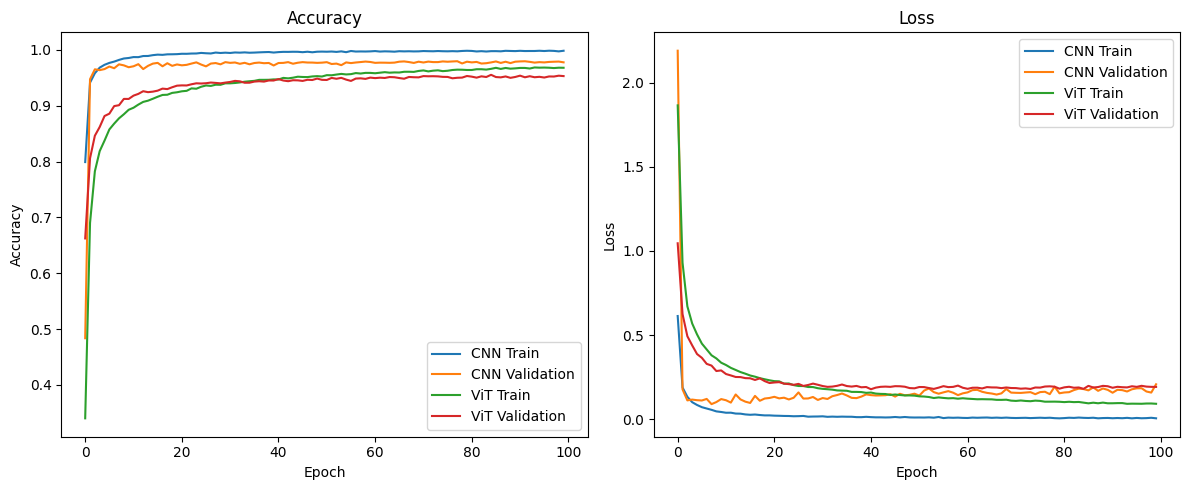

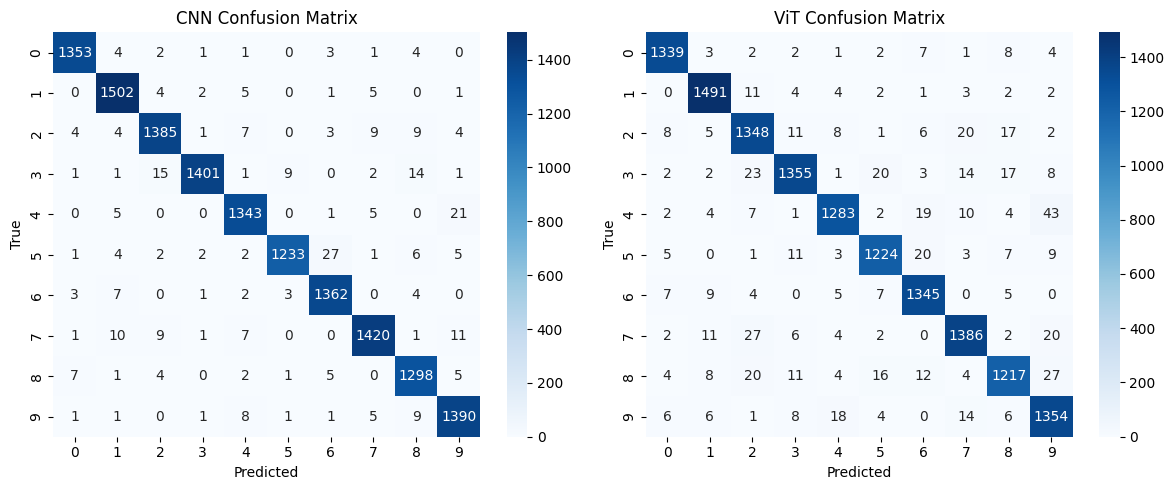


CNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1369
           1       0.98      0.99      0.98      1520
           2       0.97      0.97      0.97      1426
           3       0.99      0.97      0.98      1445
           4       0.97      0.98      0.98      1375
           5       0.99      0.96      0.97      1283
           6       0.97      0.99      0.98      1382
           7       0.98      0.97      0.98      1460
           8       0.97      0.98      0.97      1323
           9       0.97      0.98      0.97      1417

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000


ViT Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1369
           1       0.97      0.98      0.97      1520
           2       0.9

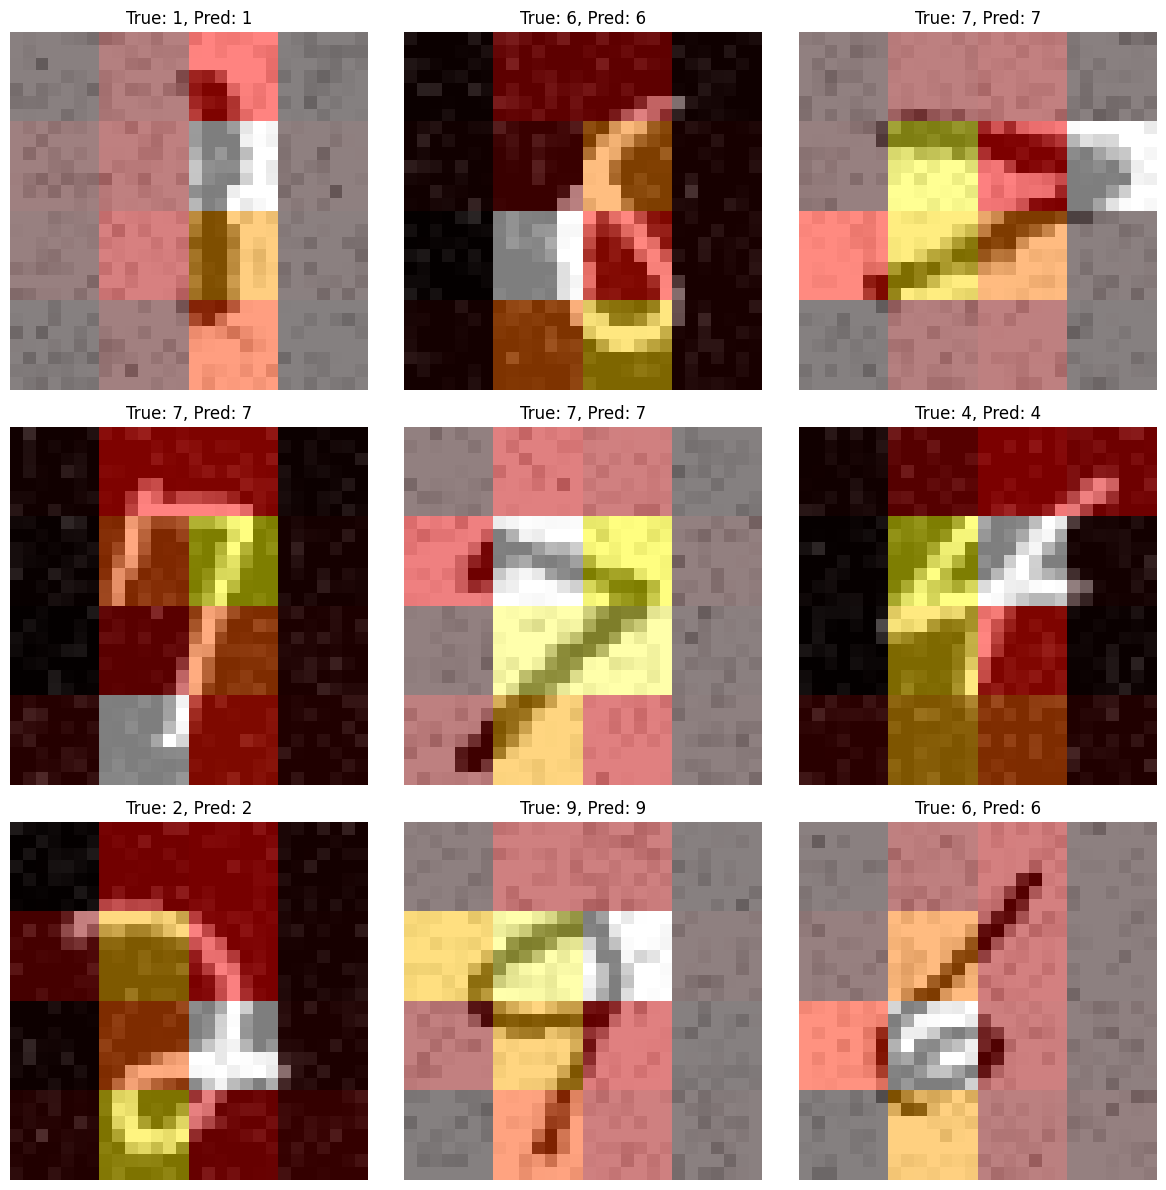

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


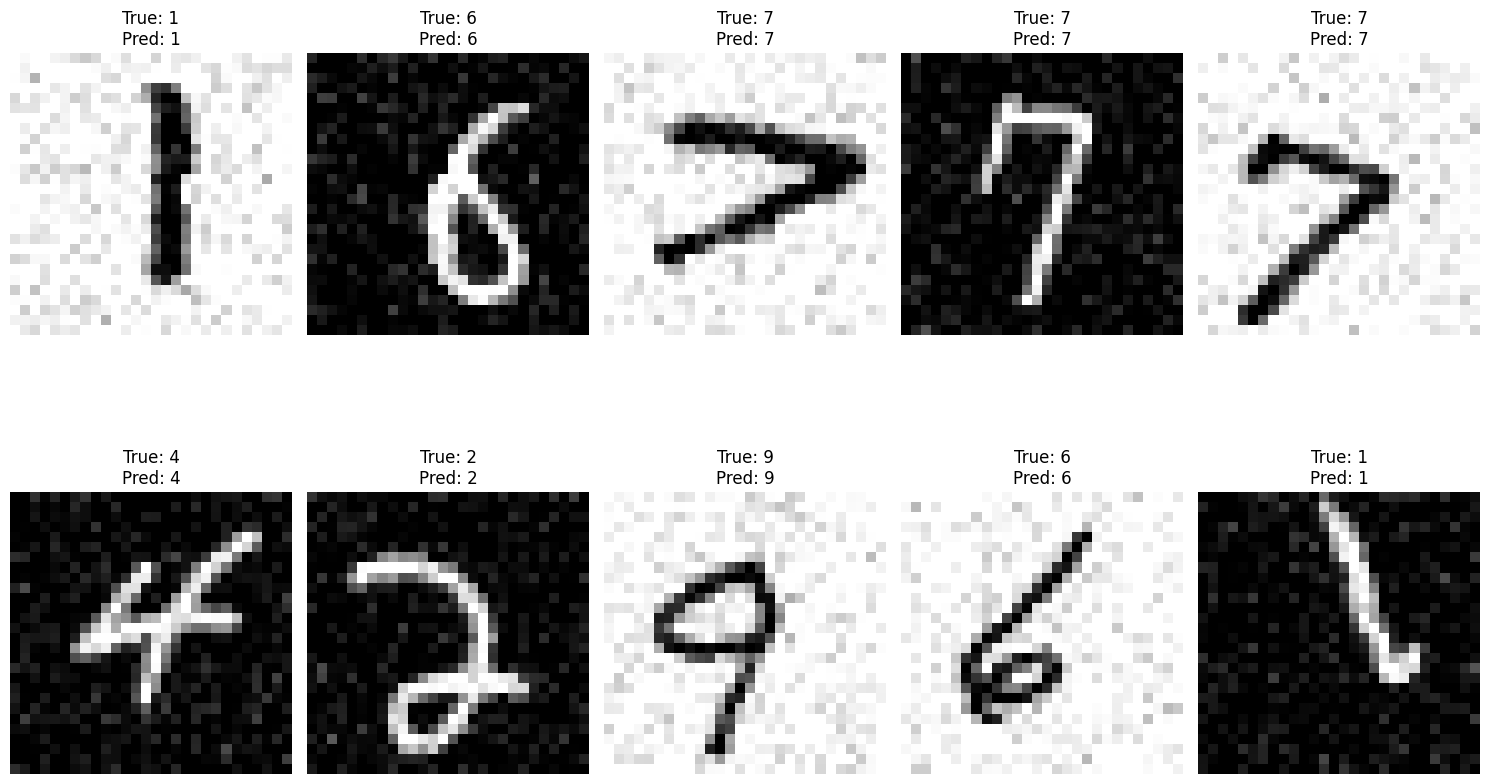

In [6]:
# Create class names for MNIST dataset
mnist_class_names = [str(i) for i in range(10)]  # 0-9 for MNIST

# Create evaluator with both models
evaluator = ModelEvaluator(
    model_trainers={
        'CNN': mnist_cnn_trainer,
        'ViT': mnist_vit_trainer
    },
    test_dataset=mnist_test_loader,
    class_names=mnist_class_names
)

# Run all evaluations
evaluator.evaluate_all()

# Compare training histories
evaluator.compare_training_history()

# Plot confusion matrices
evaluator.plot_confusion_matrices()

# Print detailed classification reports
evaluator.print_classification_reports()

# Visualize attention maps for ViT model
evaluator.visualize_attention_maps('ViT')

# Optionally show some example predictions
plot_model_examples(mnist_vit_trainer.model, mnist_test_loader, class_names=mnist_class_names)

Training CNN on Relational Dataset...
Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.1272 - loss: 2.2940 - val_accuracy: 0.1258 - val_loss: 10.6788
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1225 - loss: 2.0794 - val_accuracy: 0.1248 - val_loss: 2.9571
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1270 - loss: 2.0790 - val_accuracy: 0.1177 - val_loss: 2.0827
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1266 - loss: 2.0787 - val_accuracy: 0.1145 - val_loss: 2.0809
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1190 - loss: 2.0788 - val_accuracy: 0.1145 - val_loss: 2.0797
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1268 - loss: 2.0786 - val_accuracy: 0.1153 - val_loss: 2.0803
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1290 - loss: 2.0778 - val_accuracy: 0.1145 - val_loss: 2.0799
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - a

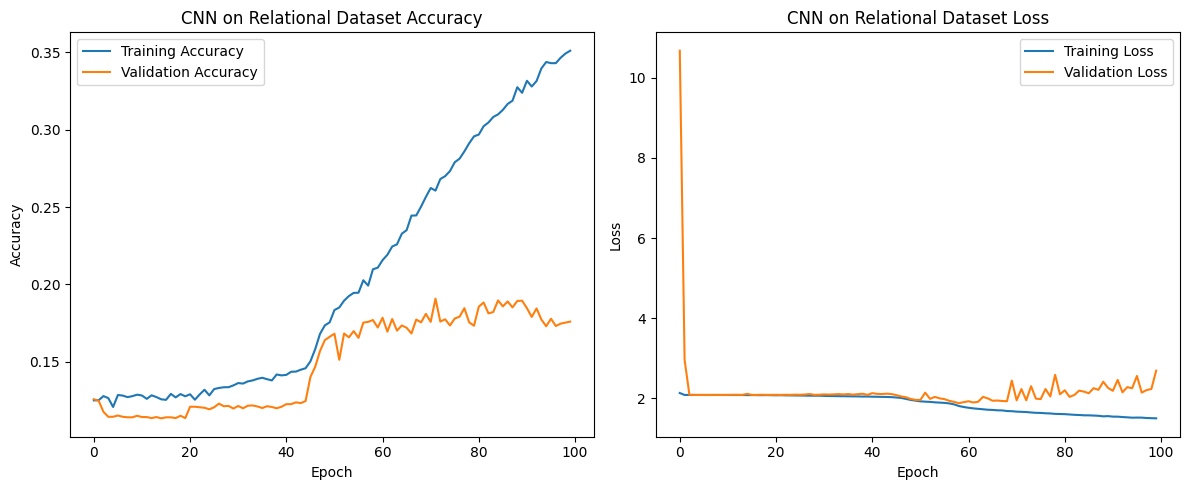

Training ViT on Relational Dataset...
Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.1250 - loss: 2.2794 - val_accuracy: 0.1255 - val_loss: 2.0938
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1283 - loss: 2.1021 - val_accuracy: 0.1190 - val_loss: 2.0972
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1355 - loss: 2.0884 - val_accuracy: 0.1198 - val_loss: 2.0984
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1376 - loss: 2.0885 - val_accuracy: 0.1190 - val_loss: 2.0991
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1442 - loss: 2.0808 - val_accuracy: 0.1212 - val_loss: 2.0888
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1558 - loss: 2.0702 - val_accuracy: 0.1275 - val_loss: 2.1037
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1662 - loss: 2.0643 - val_accuracy: 0.1197 - val_loss: 2.1015
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - ac

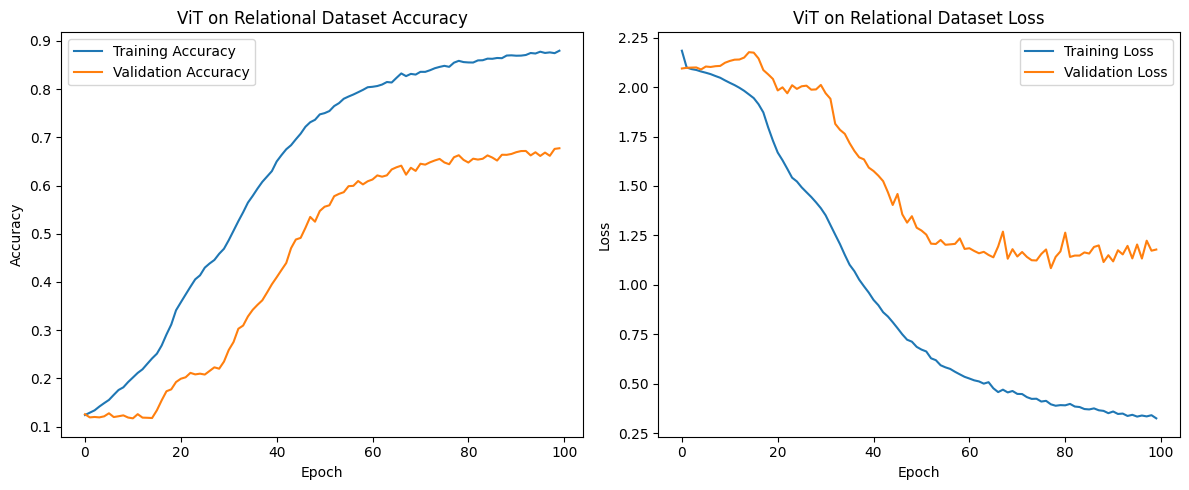

In [7]:
# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Relational Dataset Models Training Section

# Initialize CNN model for Relational Dataset
rel_cnn_model = CNN(
    num_classes=8,  # Relational Dataset has 8 classes (digits 0-7)
    in_channels=1,   # Grayscale images
    img_size=64,     # Relational Dataset images are 64x64
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=3
)

# Compile the model
rel_cnn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational dataset
rel_cnn_trainer = ModelTrainer(rel_cnn_model, rel_train_loader, rel_test_loader, model_name="CNN on Relational Dataset")

# Train the model
print("Training CNN on Relational Dataset...")
rel_cnn_trainer.train(epochs=100, early_stopping=False)
rel_cnn_trainer.evaluate()
rel_cnn_trainer.plot_training_history()

# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Initialize Vision Transformer for Relational Dataset
rel_vit_model = VisionTransformer(
    patch_size=7,
    image_size=64,
    embedding_dim=64,
    num_heads=4,
    num_classes=8,
    in_channels=1,
    dropout_rate=0.2,
    num_blocks=2
)

# Compile the model
optimizer = tf.keras.optimizers.AdamW(learning_rate=5e-4, weight_decay=1e-4)

rel_vit_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset dataset with ViT
rel_vit_trainer = ModelTrainer(rel_vit_model, rel_train_loader, rel_test_loader, model_name="ViT on Relational Dataset")

# Train the model
print("Training ViT on Relational Dataset...")
rel_vit_trainer.train(epochs=100, early_stopping=False)
rel_vit_trainer.evaluate()
rel_vit_trainer.plot_training_history()


Evaluating CNN...
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.1760, Test Loss: 2.6857

Evaluating ViT...
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test Accuracy: 0.6773, Test Loss: 1.1788


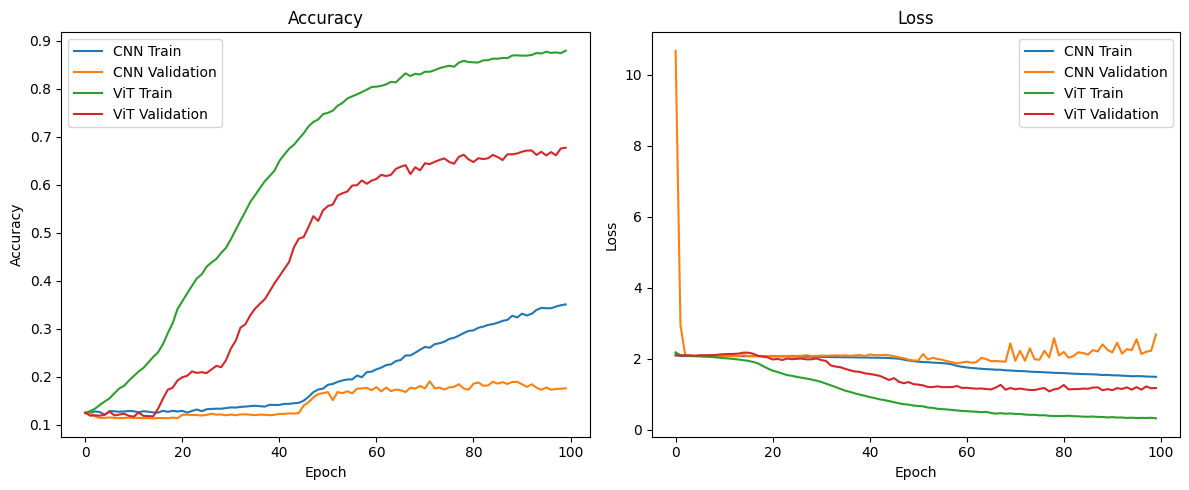

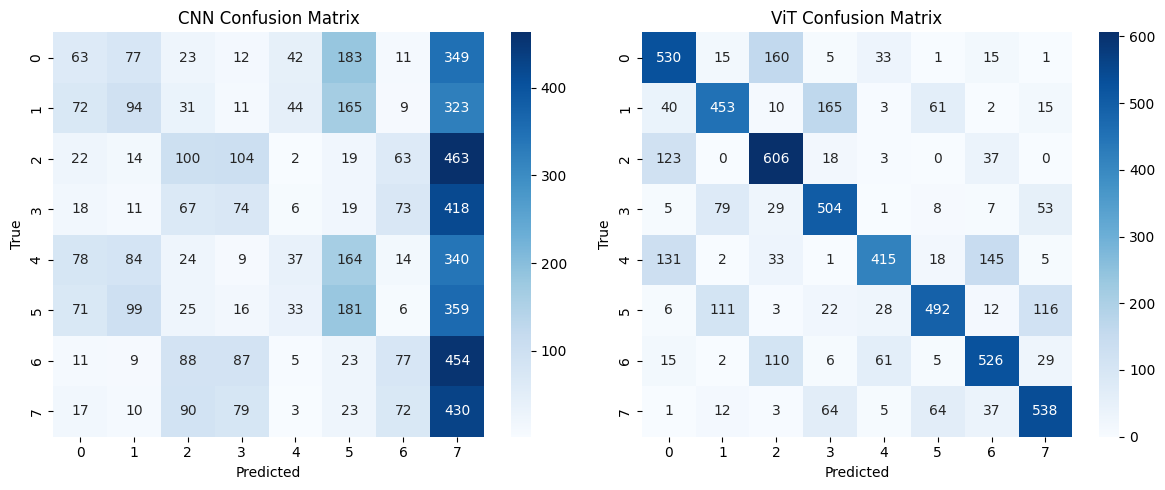


CNN Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.08      0.11       760
           1       0.24      0.13      0.16       749
           2       0.22      0.13      0.16       787
           3       0.19      0.11      0.14       686
           4       0.22      0.05      0.08       750
           5       0.23      0.23      0.23       790
           6       0.24      0.10      0.14       754
           7       0.14      0.59      0.22       724

    accuracy                           0.18      6000
   macro avg       0.21      0.18      0.16      6000
weighted avg       0.21      0.18      0.16      6000


ViT Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       760
           1       0.67      0.60      0.64       749
           2       0.64      0.77      0.70       787
           3       0.64      0.73      0.69       686
           4       0.7

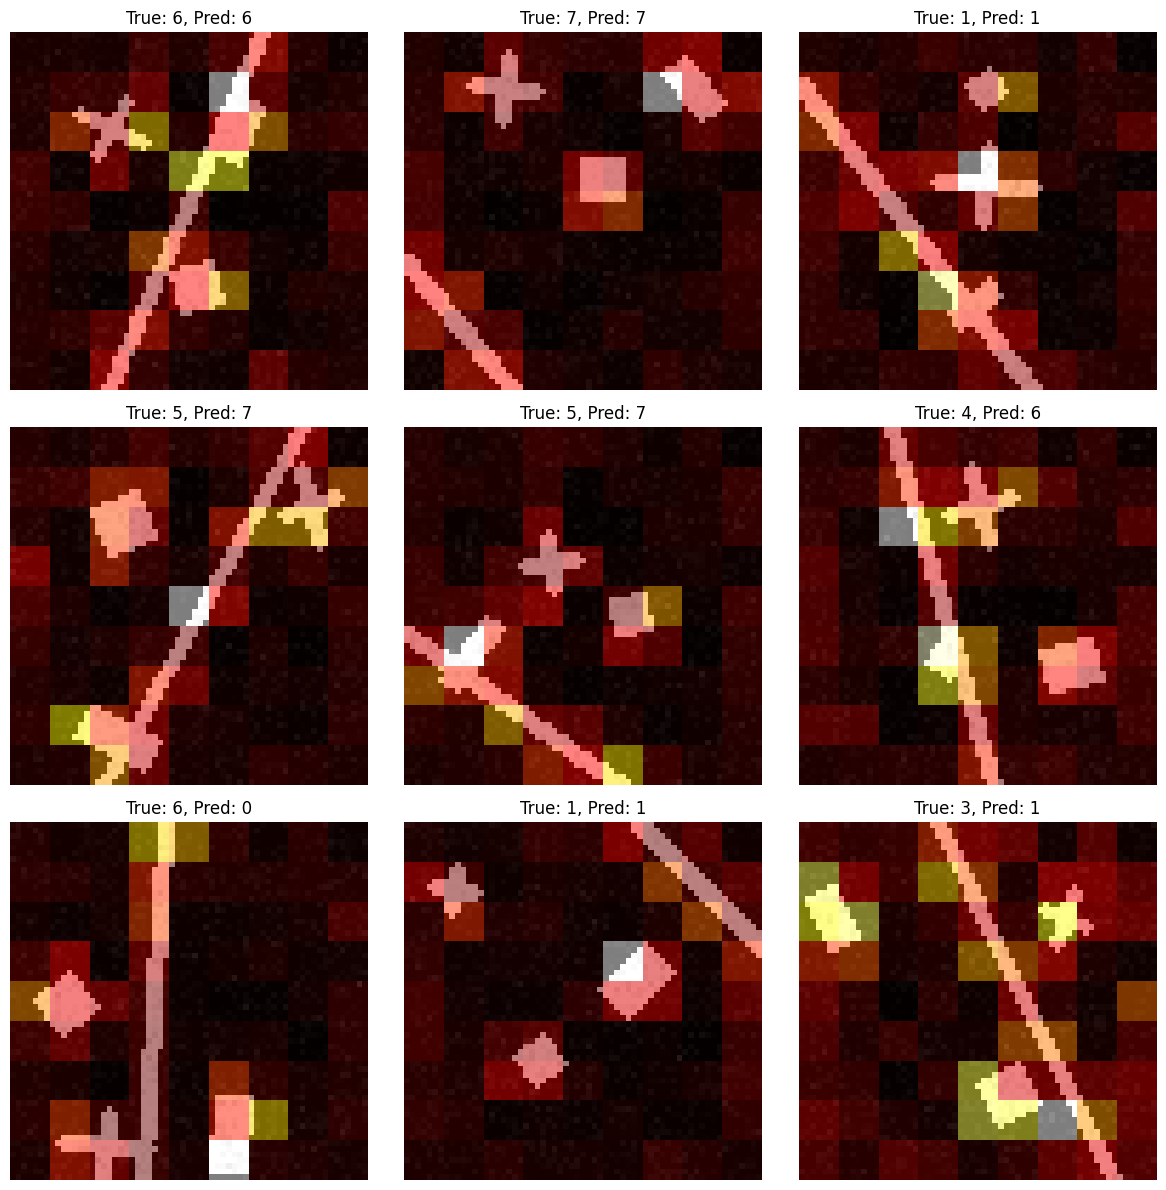

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


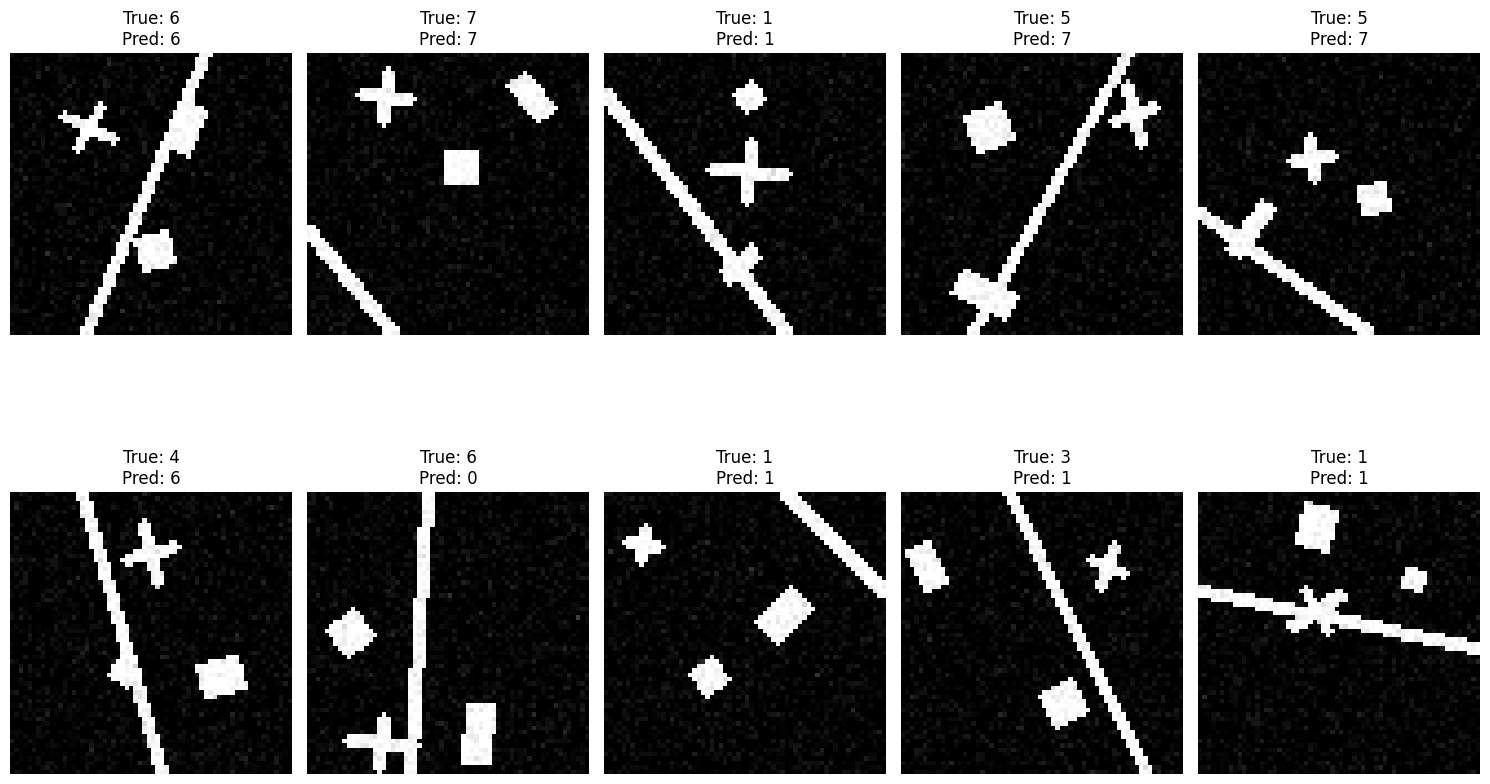

In [8]:
# Create class names for Relational Dataset dataset
rel_class_names = [str(i) for i in range(8)]  # 0-7 for Relational Dataset

# Create evaluator with both models
evaluator = ModelEvaluator(
    model_trainers={
        'CNN': rel_cnn_trainer,
        'ViT': rel_vit_trainer
    },
    test_dataset=rel_test_loader,
    class_names=rel_class_names
)

# Run all evaluations
evaluator.evaluate_all()

# Compare training histories
evaluator.compare_training_history()

# Plot confusion matrices
evaluator.plot_confusion_matrices()

# Print detailed classification reports
evaluator.print_classification_reports()

# Visualize attention maps for ViT model
evaluator.visualize_attention_maps('ViT')

# Optionally show some example predictions
plot_model_examples(rel_vit_trainer.model, rel_test_loader, class_names=rel_class_names)

In [9]:
# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Relational Dataset Models Training Section - 4 Layers
# Initialize CNN model for Relational Dataset with 4 layers
rel_cnn_model_4_layers = CNN(
    num_classes=8,  # Relational Dataset has 8 classes (digits 0-7)
    in_channels=1,   # Grayscale images
    img_size=64,     # Relational Dataset images are 64x64
    kernel_size=3,
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=4
)

# Compile the model
rel_cnn_model_4_layers.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset with 4 layers
rel_cnn_trainer_4_layers = ModelTrainer(rel_cnn_model_4_layers, rel_train_loader, rel_test_loader, model_name="CNN (4 layers) on Relational Dataset")

# Train the model
print("Training CNN with 4 layers on Relational Dataset...")
rel_cnn_trainer_4_layers.train(epochs=100, early_stopping=False)

# Reset TensorFlow session for the next model
tf.keras.backend.clear_session()
gc.collect()

# Initialize CNN model for Relational Dataset with 5 layers
rel_cnn_model_5_layers = CNN(
    num_classes=8,  # Relational Dataset has 8 classes (digits 0-7)
    in_channels=1,   # Grayscale images
    img_size=64,     # Relational Dataset images are 64x64
    kernel_size=3,
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=5
)

# Compile the model
rel_cnn_model_5_layers.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset with 5 layers
rel_cnn_trainer_5_layers = ModelTrainer(rel_cnn_model_5_layers, rel_train_loader, rel_test_loader, model_name="CNN (5 layers) on Relational Dataset")

# Train the model
print("Training CNN with 5 layers on Relational Dataset...")
rel_cnn_trainer_5_layers.train(epochs=100, early_stopping=False)

Training CNN with 4 layers on Relational Dataset...
Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.1239 - loss: 2.2335 - val_accuracy: 0.1335 - val_loss: 2.5390
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1313 - loss: 2.0795 - val_accuracy: 0.1217 - val_loss: 2.2797
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1288 - loss: 2.0792 - val_accuracy: 0.1172 - val_loss: 2.0805
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1310 - loss: 2.0790 - val_accuracy: 0.1147 - val_loss: 2.0800
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1240 - loss: 2.0794 - val_accuracy: 0.1143 - val_loss: 2.0797
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1186 - loss: 2.0794 - val_accuracy: 0.1142 - val_loss: 2.0801
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1283 - loss: 2.0791 - val_accuracy: 0.1143 - val_loss: 2.0800
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s


Evaluating CNN_3_layers...
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.1760, Test Loss: 2.6857

Evaluating CNN_4_layers...
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.7998, Test Loss: 1.6655

Evaluating CNN_5_layers...
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy: 0.6367, Test Loss: 2.2629


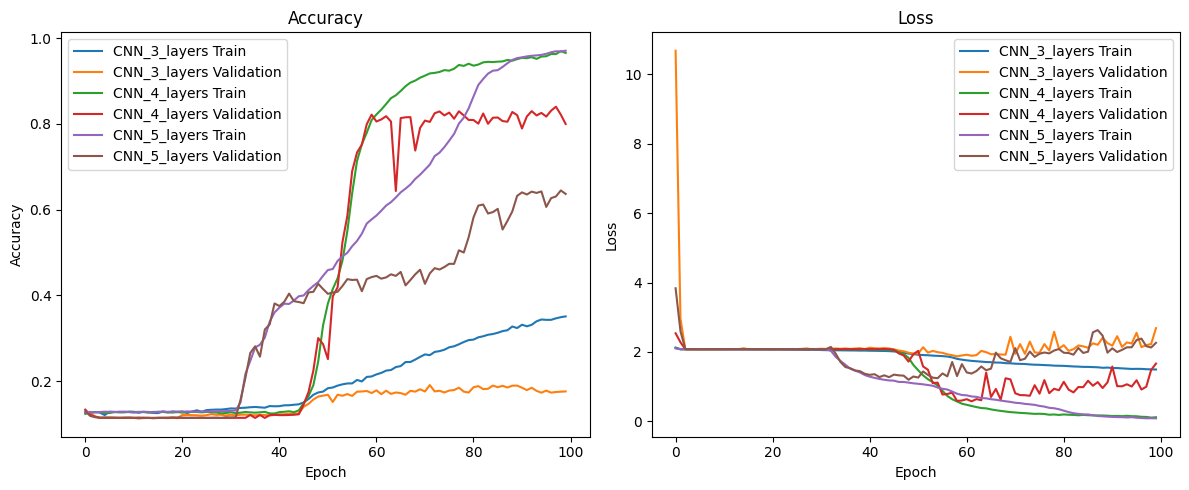

In [10]:
# Create class names for MNIST dataset
rel_class_names = [str(i) for i in range(8)]  # 0-7 for Relational Dataset

# Create evaluator with both models
evaluator = ModelEvaluator(
    model_trainers={
        'CNN_3_layers': rel_cnn_trainer,
        'CNN_4_layers': rel_cnn_trainer_4_layers,
        'CNN_5_layers': rel_cnn_trainer_5_layers
    },
    test_dataset=rel_test_loader,
    class_names=rel_class_names
)

# Run all evaluations
evaluator.evaluate_all()

# Compare training histories
evaluator.compare_training_history()

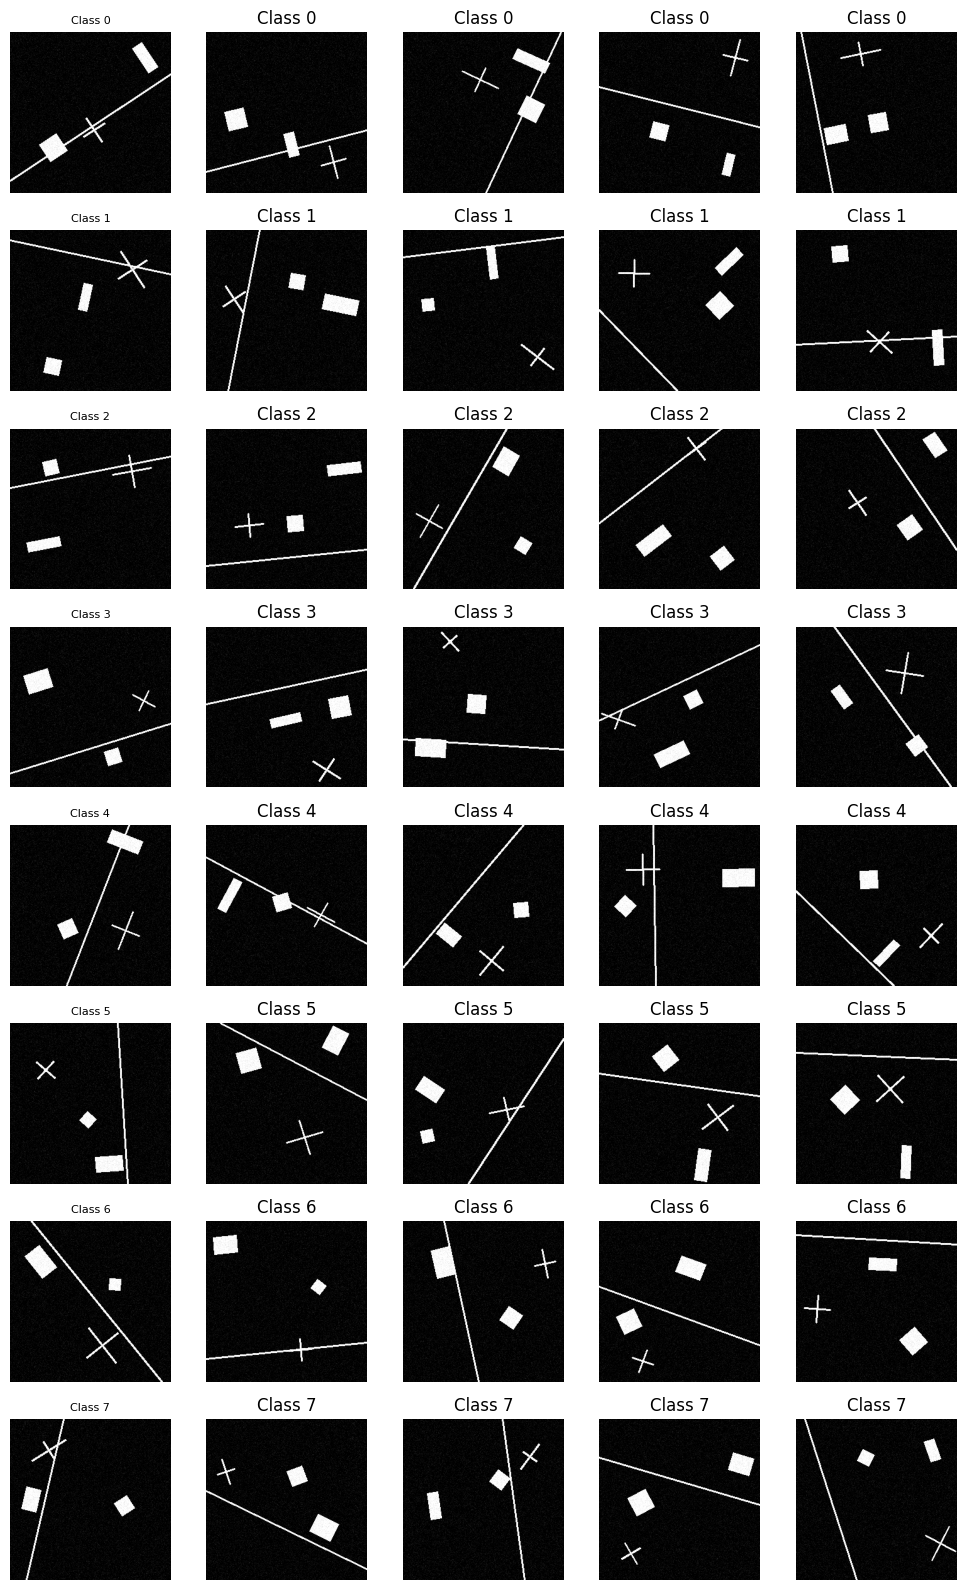

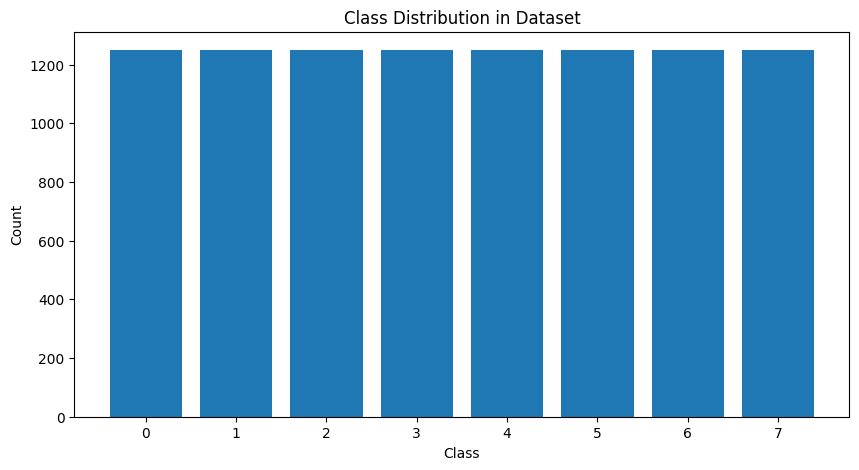

In [14]:
# Create dataset
relational_dataset = RelationalDataset(num_samples=10000, img_size=256)

# Visualize dataset
visualize_dataset_examples(relational_dataset, "Relational Dataset Examples")
plot_class_distribution(relational_dataset)

# Create TensorFlow dataset
rel_train_loader, rel_test_loader = create_tf_datasets(relational_dataset, batch_size=64)

In [ ]:
# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Relational Dataset Models Training Section for 256x256 images

# Initialize Vision Transformer for Relational Dataset
rel_vit_model = VisionTransformer(
    patch_size=7,
    image_size=128,
    embedding_dim=64,
    num_heads=4,
    num_classes=8,
    in_channels=1,
    dropout_rate=0.2,
    num_blocks=2
)

# Compile the model
optimizer = tf.keras.optimizers.AdamW(learning_rate=5e-4, weight_decay=1e-4)

rel_vit_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset dataset with ViT
rel_vit_trainer = ModelTrainer(rel_vit_model, rel_train_loader, rel_test_loader, model_name="ViT on Relational Dataset")

# Train the model
print("Training ViT on Relational Dataset...")
rel_vit_trainer.train(epochs=100, early_stopping=False)


# Initialize CNN model for Relational Dataset with 3 layers
rel_cnn_model_3_layers = CNN(
    num_classes=8,  # Relational Dataset has 8 classes
    in_channels=1,  # Grayscale images
    img_size=128,   # Using the 256x256 images
    kernel_size=3,
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=3
)

# Compile the model
rel_cnn_model_3_layers.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset with 3 layers
rel_cnn_trainer_3_layers = ModelTrainer(rel_cnn_model_3_layers, rel_train_loader, rel_test_loader, model_name="CNN (3 layers) on 256x256 Relational Dataset")

# Train the model
print("Training CNN with 3 layers on 256x256 Relational Dataset...")
rel_cnn_trainer_3_layers.train(epochs=100, early_stopping=False)

# Reset TensorFlow session for the next model
tf.keras.backend.clear_session()
gc.collect()

# Initialize CNN model for Relational Dataset with 4 layers
rel_cnn_model_4_layers = CNN(
    num_classes=8, 
    in_channels=1,  
    img_size=128,   # Using the 256x256 images
    kernel_size=3,
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=4
)

# Compile the model
rel_cnn_model_4_layers.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset with 4 layers
rel_cnn_trainer_4_layers = ModelTrainer(rel_cnn_model_4_layers, rel_train_loader, rel_test_loader, model_name="CNN (4 layers) on 256x256 Relational Dataset")

# Train the model
print("Training CNN with 4 layers on 256x256 Relational Dataset...")
rel_cnn_trainer_4_layers.train(epochs=100, early_stopping=False)

# Reset TensorFlow session for the next model
tf.keras.backend.clear_session()
gc.collect()

# Initialize CNN model for Relational Dataset with 5 layers
rel_cnn_model_5_layers = CNN(
    num_classes=8,
    in_channels=1,
    img_size=128,   # Using the 256x256 images
    kernel_size=3,
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=5
)

# Compile the model
rel_cnn_model_5_layers.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset with 5 layers
rel_cnn_trainer_5_layers = ModelTrainer(rel_cnn_model_5_layers, rel_train_loader, rel_test_loader, model_name="CNN (5 layers) on 256x256 Relational Dataset")

# Train the model
print("Training CNN with 5 layers on 256x256 Relational Dataset...")
rel_cnn_trainer_5_layers.train(epochs=100, early_stopping=False)

Training ViT on Relational Dataset...
Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 206ms/step - accuracy: 0.1266 - loss: 9.8522 - val_accuracy: 0.1445 - val_loss: 2.4260
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - accuracy: 0.1425 - loss: 2.3152 - val_accuracy: 0.1515 - val_loss: 2.1887
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - accuracy: 0.1581 - loss: 2.2309 - val_accuracy: 0.1170 - val_loss: 2.2355
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - accuracy: 0.1906 - loss: 2.1302 - val_accuracy: 0.1280 - val_loss: 2.1984
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - accuracy: 0.2393 - loss: 1.9909 - val_accuracy: 0.1335 - val_loss: 2.2563
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - accuracy: 0.3068 - loss: 1.8329 - val_accuracy: 0.1475 - val_loss: 2.4090
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.4302 - loss: 1.5741 - val_accuracy: 0.1245 - val_loss: 2.6138
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Create class names for Relational dataset
rel_class_names = [str(i) for i in range(8)]  # 0-7 for Relational Dataset

# Create evaluator with both models
evaluator = ModelEvaluator(
    model_trainers={
        'ViT': rel_vit_trainer,
        'CNN_3_layers': rel_cnn_trainer,
        'CNN_4_layers': rel_cnn_trainer_4_layers,
        'CNN_5_layers': rel_cnn_trainer_5_layers
    },
    test_dataset=rel_test_loader,
    class_names=rel_class_names
)

# Run all evaluations
evaluator.evaluate_all()

# Compare training histories
evaluator.compare_training_history()